In [1]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np
import matplotlib.pyplot as plt


In [2]:
warnings.filterwarnings('ignore')

##Loading Dataset

In [3]:
iris = datasets.load_iris()
data = iris.data[:,:2]
label = iris.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.1, random_state = 13)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(135, 2)
(135,)
(15, 2)
(15,)


In [6]:
print(y_test)

[1 1 0 2 2 0 2 2 0 1 2 2 1 0 2]


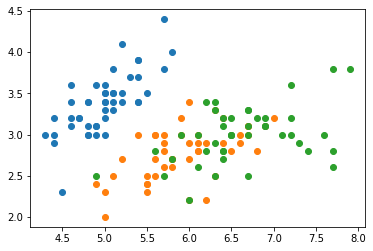

In [7]:
for class_value in range(3):
    row_ix = np.where(y_train == class_value)
    plt.scatter(x_train[row_ix, 0],x_train[row_ix, 1])
plt.show()

In [12]:
model = OneVsRestClassifier(SVC())
clf = model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(f"Test Set Accuracy : {accuracy_score(    y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(    y_test, prediction)}")   

Test Set Accuracy : 66.66666666666666 %


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.44      1.00      0.62         4
           2       1.00      0.29      0.44         7

    accuracy                           0.67        15
   macro avg       0.81      0.76      0.69        15
weighted avg       0.85      0.67      0.64        15



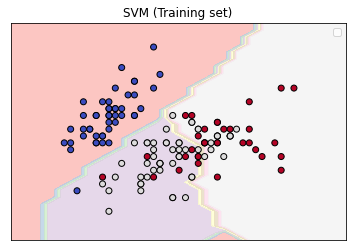

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
X_set, y_set = sc.inverse_transform(x_train), y_train

## making meshgrid
min1, max1 = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1 
min2, max2 = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25) 
X1, X2 = np.meshgrid(x_scale, y_scale)

X_flatten = np.array([X1.ravel(), X2.ravel()])
X_transformed = sc.transform(X_flatten.T)
Z_pred = model.predict(X_transformed).reshape(X1.shape)

fig, ax = plt.subplots()
ax.contourf(X1, X2, Z_pred, alpha = 0.75, cmap = 'Pastel1')
plt.scatter(x_train[:,:1],x_train[:,1:2],c = y_train , cmap = plt.cm.coolwarm, edgecolors = 'k' )
ax.set_xticks(())
ax.set_yticks(())


plt.title('SVM (Training set)')
plt.legend()
#plt.show()

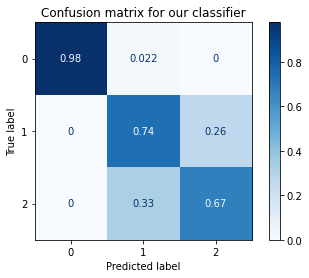

In [14]:
# Generate confusion matrix
from sklearn.metrics import plot_confusion_matrix
#print('Confidence Matrix:\n', confusion_matrix(y, model.predict(x)) / 150)
matrix = plot_confusion_matrix(clf, x_train, y_train,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()